In [44]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/yoavfreund/miniforge3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['gamma', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [45]:
from scipy.stats import norm


In [76]:
def row_normalize(K):
    return (K.T/(sum(K,axis=1))).T
def col_normalize(K):
    return (K/(sum(K,axis=0)))
LV={}

In [77]:
n=1000 # vector size is n+2
gamma=0.5 
kernel_scale=0.05


In [78]:
def set_X_values(n,min=0,max=1):
    X=arange(min,max+1e-10,(max-min)/(n-1))
    if X.shape[0]>n:
        X=X[:n]
    return X

In [79]:
def set_matrix(n=100,gamma=1, kernel_scale=0.05):
    x = np.linspace(norm.ppf(0.01),
        norm.ppf(0.99), 2*n+2)
    kernel = norm(scale=kernel_scale).pdf(x)

    ## define matrix
    K=np.zeros([n+2,n])
    for i in range(n+1):
        for j in range(n):
            K[i,j]=kernel[int(i-j+n)]
    K=col_normalize(K)
    K[-1,:]=gamma
    K[:-1,:]*=1-gamma

    return K
K=set_matrix(n=n,gamma=gamma,kernel_scale=kernel_scale)
K.shape,gamma

((1002, 1000), 0.5)

In [80]:
def iterate(K):
    figure(figsize=[12,8])
    V=zeros(n+2)
    V[0:int(n/10)]=1; 
    V[-1]=0
    X=set_X_values(V.shape[0],0,4)
    for i in range(500):
        Vold=array(V)
        V[1:-1]=np.dot(V,K)
        if i % 50 ==0 :
            plot(X,V,label=str(i))
            print('iter',i,'step=',linalg.norm(V-Vold)/n)
    legend()
    grid()
    title(f'n={n}, kernel_scale={kernel_scale},gamma={gamma}');
    return V

iter 0 step= 0.005493075300662271
iter 50 step= 2.3065451310964913e-18
iter 100 step= 2.1091910209480264e-34
iter 150 step= 0.0
iter 200 step= 0.0
iter 250 step= 0.0
iter 300 step= 0.0
iter 350 step= 0.0
iter 400 step= 0.0
iter 450 step= 0.0


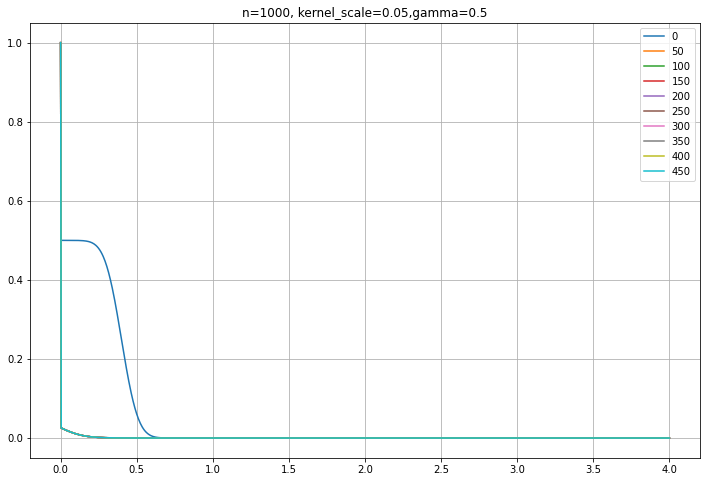

In [81]:
V=iterate(K)

In [71]:
sum(V)*gamma

0.822621441394085

0.0009765625 0.1670429359537589
0.001953125 0.09469247315751703
0.00390625 0.0346660726517365
0.0078125 0.007109885450142767


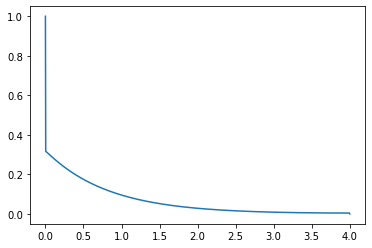

In [72]:
for i in arange(-10,0,1):
    gamma=2.**i
    K=set_matrix(n=n,gamma=gamma,kernel_scale=kernel_scale)
    V=zeros(n+2)
    V[0:int(n/10)]=1; 
    V[-1]=0
    for i in range(1000):

        V[1:-1]=np.dot(V,K)
    small=V[int(0.8*n)]
    print(gamma,small)
    if small<1e-2:
        break
X=set_X_values(V.shape[0],0,4)
plot(X,V,label=str(i))

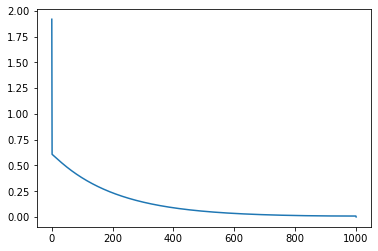

In [73]:
Vs=V/(sum(V)*gamma)
plot(Vs)

In [74]:
LV[n]=[X,Vs]

LV.keys()

dict_keys([100, 10, 1000])

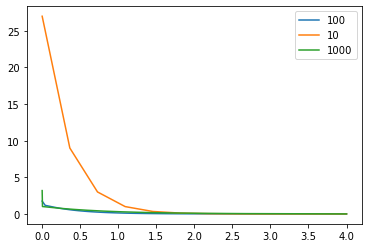

In [75]:
for key in LV:
    x,v=LV[key]
    plot(x,v/v[3],label=str(key))
legend()

In [275]:
mean(v)

0.006149229751054583